In [40]:
import pandas as pd
import janitor
import seaborn as sns
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

## Infectious Disease

In [2]:
df = pd.read_csv('data/HOSPITAL.DAT.txt').clean_names()

In [3]:
df.head()

,id,dur_stay,age,sex,temp,wbc,antibio,bact_cul,service
0,1,5,30,2,99.0,8,2,2,1
1,2,10,73,2,98.0,5,2,1,1
2,3,6,40,2,99.0,12,2,2,2
3,4,11,47,2,98.2,4,2,2,2
4,5,5,25,2,98.5,11,2,2,2


##### 2.1 

In [4]:
df.dur_stay.mean()

8.6

In [5]:
df.dur_stay.median()

8.0

##### 2.2

In [6]:
df.dur_stay.std()

5.715476066494082

In [7]:
(df.dur_stay.min(), df.dur_stay.max())

(3, 30)

#### 2.3

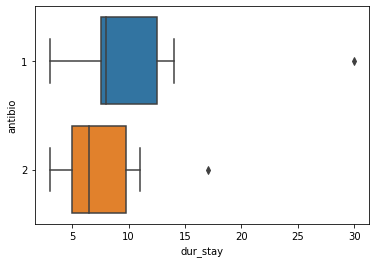

In [8]:
sns.boxplot(data=df, x='dur_stay', y='antibio', orient='h');

#### 2.4

Median will be also multiplied

In [9]:
(df.dur_stay*2).median(), df.dur_stay.median()*2

(16.0, 16.0)

#### 2.5

Mode will be also multiplied

In [10]:
(df.dur_stay*2).min(), (df.dur_stay*2).max()

(6, 60)

#### 2.6

Geometrical mean will be also multiplied

In [11]:
scipy.stats.gmean(df.dur_stay*2), scipy.stats.gmean(df.dur_stay)*2

(14.6064776206551, 14.60647762065509)

#### 2.7

Rande will be also multiplied

In [12]:
((df.dur_stay*2).min(), (df.dur_stay*2).max()), ((df.dur_stay).min()*2, (df.dur_stay).max()*2)

((6, 60), (6, 60))

### Health promotion

In [13]:
scipy.stats.gmean(df.dur_stay*2), scipy.stats.gmean(df.dur_stay)*2

(14.6064776206551, 14.60647762065509)

In [14]:
df = pd.DataFrame([12.8, 12.2, 12.25, 12.18, 11.53, 12.47, 12.30, 12.08, 11.72, 11.57, 11.73, 12.67, 11.92, 11.67, 11.80, 12.33, 12.55, 11.83], index=range(1,19), columns=['time'])
df.head()

,time
1,12.80
2,12.20
3,12.25
4,12.18
5,11.53


#### 2.8 

In [15]:
df.time.mean()

12.088888888888892

#### 2.9

In [16]:
df.time.std()

0.38741813387800583

#### 12.10

In [17]:
df['time_100'] = (df.time*100).astype(int)
df.sample(5)

,time,time_100
13,11.92,1192
12,12.67,1267
16,12.33,1233
18,11.83,1183
15,11.80,1180


In [18]:
df.time_100.mean()

1208.888888888889

In [19]:
df.time_100.std()

38.74181338780057

#### 2.12

<AxesSubplot:xlabel='time'>

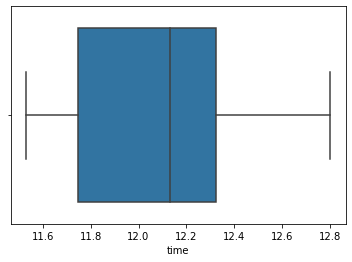

In [20]:
sns.boxplot(data=df, x='time')

In [21]:
iqr = scipy.stats.iqr(df.time)
upper_limit = np.percentile(df.time, 75) + 1.5*iqr

In [22]:
12.97 > upper_limit

False

### Cardiovascular Disease

In [23]:
df = pd.read_excel('data/Cholesterol.xlsx').set_index('Subject')
df.Difference = df.Before - df.After

In [24]:
df.sample(5)

,Before,After,Difference
Subject,,,
18,222,187,35
24,137,125,12
19,168,176,-8
7,250,202,48
17,180,161,19


#### 2.13

In [25]:
df.Difference.mean()

19.541666666666668

#### 2.14

In [26]:
df.Difference.mean()

19.541666666666668

In [27]:
df.Difference.std()

16.805742203618763

#### 2.16

In [28]:
df.Difference.median()

19.0

#### 2.17

<AxesSubplot:xlabel='Difference'>

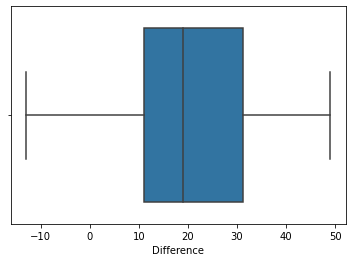

In [29]:
sns.boxplot(data=df, x='Difference')

#### 2.18

In [30]:
df['base_level'] = (df.Before < df.Before.median()).map({True: 'low', False: 'high'})

<AxesSubplot:xlabel='base_level', ylabel='Difference'>

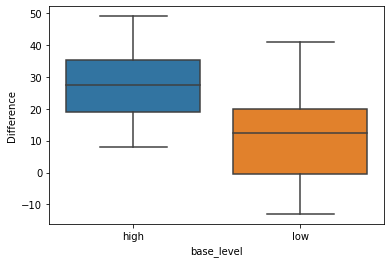

In [31]:
sns.boxplot(data=df, x='base_level', y='Difference')

### Hypertension

In [32]:
df = pd.read_excel('data/hypertension.xlsx').set_index('Participant')
df.sample(5)

,Recumbent systolic,Recumbent diastolic,Standing systolic,Standing diastolic
Participant,,,,
T. F. H.,120,70,118,84
H. B. H.,118,58,92,58
T. H. S.,102,68,96,64
C. R. F.,110,78,102,80
F. L. B.,108,72,102,68


#### 2.19

In [33]:
df['Systolic diff'] = df['Recumbent systolic'] - df['Standing systolic']
df['Diastolic diff'] = df['Recumbent diastolic'] - df['Standing diastolic']

In [34]:
df['Systolic diff'].mean(), df['Systolic diff'].median()

(8.8125, 8.0)

In [35]:
df['Diastolic diff'].mean(), df['Diastolic diff'].median()

(0.9375, 1.0)

#### 2.20

<AxesSubplot:ylabel='Diastolic diff'>

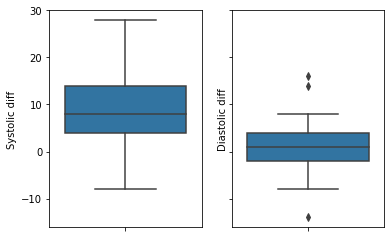

In [45]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot(data=df, y='Systolic diff', ax=ax1)
sns.boxplot(data=df, y='Diastolic diff', ax=ax2)

#### 2.22

In [48]:
df['Systolic diff'].quantile([0.1, 0.9])

0.1     0.2
0.9    15.8
Name: Systolic diff, dtype: float64